In [1]:
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import unet_metrics_plotting
import matplotlib.colors as mcolors

In [2]:
training_records = pd.read_csv('../training_records.csv')
training_records['mean_acc'] = training_records.apply(lambda x: np.mean([x['Training_acc'], x['Eval_acc'], x['Test_acc']]), axis=1)
training_records['mean_IoU'] = training_records.apply(lambda x: np.mean([x['Training_IoU'], x['Eval_IoU'], x['Test_IoU']]), axis=1)
hybas_lev02 = gpd.read_file('/WORK/Data/global_lake_area/vector_data/hybas_lev02/hybas_lev02_v1c_merged_lake_count_added_gt100.geojson')[['HYBAS_ID', 'geometry']]
merged_training_records = training_records.merge(hybas_lev02, left_on='Model Name', right_on='HYBAS_ID', how='inner')
merged_training_records = gpd.GeoDataFrame(merged_training_records, crs='EPSG:4326', geometry='geometry')
print(merged_training_records.columns)

Index(['Model Name', 'Trained', 'Training set size', 'Evaluation set size',
       'Final_decision', 'Training_acc', 'Eval_acc', 'Test_acc', 'Keep ratio',
       'Batch_processed', 'Training_IoU', 'Eval_IoU', 'Test_IoU', 'mean_acc',
       'mean_IoU', 'HYBAS_ID', 'geometry'],
      dtype='object')


Plotting ['mean_acc'] on a
Plotting ['Training_acc', 'Eval_acc', 'Test_acc'] on b
Plotting ['mean_IoU'] on c
Plotting ['Training_IoU', 'Eval_IoU', 'Test_IoU'] on d


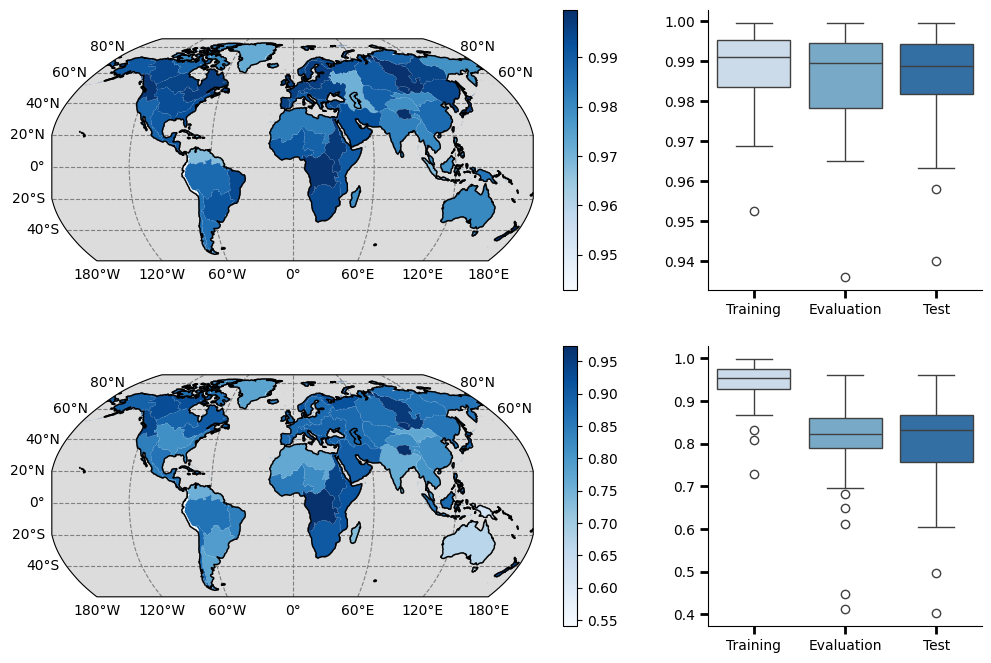

In [3]:
axes_layout = '''
    aab
    ccd
'''

axes_kws = {
    'a': {'projection': ccrs.Robinson()},
    'c': {'projection': ccrs.Robinson()}
}

metrics = [
    ['mean_acc'],
    ['Training_acc', 'Eval_acc', 'Test_acc'],
    ['mean_IoU'],
    ['Training_IoU', 'Eval_IoU', 'Test_IoU']
]

box_column_names = ['Training', 'Evaluation', 'Test']

data_df = unet_metrics_plotting.plot_unet_metrics(
    metrics_gdf=merged_training_records,
    projection=ccrs.Robinson(),
    axes_layout=axes_layout,
    axes_kws=axes_kws,
    metrics=metrics,
    box_column_names=box_column_names,
    plot_type='box_plot',
    save_path='unet_metrics.pdf',
    extent=[-180, 180, -60, 90],
)

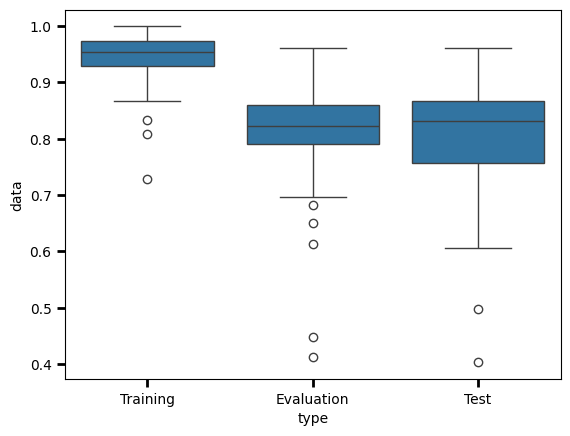

In [4]:
import seaborn as sns
ax = sns.boxplot(data=data_df, x='type', y='data')

ax.tick_params(axis='both', which='both', direction='out', length=6, width=2, colors='black')
